# QF627 Pre-Course Workshop | Introduction to Programming
## Lesson 04 | An Introduction to `pandas` Part 2 | `XZJ`view

> Yes, first a little setup. Importing the `pandas` library as `pd`

In [2]:
import pandas as pd

### Let's set some helpful display options. 

> Uncomment the boilerplate in this cell.

In [3]:
pd.set_option("max_columns", 70)
pd.set_option("max_colwidth", 30)
pd.options.display.float_format = "{:,.2f}".format

### Let's open and read in the `players.csv` and `salaries.csv` tables in the `qf627` directory

In [4]:
players = pd.read_csv("players.csv")
salaries = pd.read_csv("salaries.csv")

> Let's check to see what type each object is with `print(table_name)`. 

> You can also use the `.info()` method to explore the data's structure.

In [6]:
players.describe()

,birthYear,birthMonth,birthDay,deathYear,deathMonth,deathDay,weight,height
count,"18,703.00","18,531.00","18,382.00","9,336.00","9,335.00","9,334.00","17,975.00","18,041.00"
mean,"1,930.66",6.63,15.61,"1,963.85",6.48,15.57,185.98,72.26
std,41.23,3.47,8.75,31.51,3.53,8.78,21.23,2.60
min,"1,820.00",1.00,1.00,"1,872.00",1.00,1.00,65.00,43.00
25%,"1,894.00",4.00,8.00,"1,942.00",3.00,8.00,170.00,71.00
50%,"1,936.00",7.00,16.00,"1,966.00",6.00,15.00,185.00,72.00
75%,"1,968.00",10.00,23.00,"1,989.00",10.00,23.00,200.00,74.00
max,"1,995.00",12.00,31.00,"2,016.00",12.00,31.00,320.00,83.00


In [7]:
players.info() # find missing cases, check "Non-Null Count" 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18846 entries, 0 to 18845
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   playerID      18846 non-null  object 
 1   birthYear     18703 non-null  float64
 2   birthMonth    18531 non-null  float64
 3   birthDay      18382 non-null  float64
 4   birthCountry  18773 non-null  object 
 5   birthState    18220 non-null  object 
 6   birthCity     18647 non-null  object 
 7   deathYear     9336 non-null   float64
 8   deathMonth    9335 non-null   float64
 9   deathDay      9334 non-null   float64
 10  deathCountry  9329 non-null   object 
 11  deathState    9277 non-null   object 
 12  deathCity     9325 non-null   object 
 13  nameFirst     18807 non-null  object 
 14  nameLast      18846 non-null  object 
 15  nameGiven     18807 non-null  object 
 16  weight        17975 non-null  float64
 17  height        18041 non-null  float64
 18  bats          17655 non-nu

In [8]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25575 entries, 0 to 25574
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   yearID    25575 non-null  int64 
 1   teamID    25575 non-null  object
 2   lgID      25575 non-null  object
 3   playerID  25575 non-null  object
 4   salary    25575 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 999.1+ KB


> Let's print out sample data for each table with `table.head()`

> Let's see additional options by pressing `tab` after you type the `head()` method

In [10]:
players.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,"1,981.00",12.00,27.00,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,220.00,75.00,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,"1,934.00",2.00,5.00,USA,AL,Mobile,NaN,NaN,NaN,NaN,NaN,NaN,Hank,Aaron,Henry Louis,180.00,72.00,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,"1,939.00",8.00,5.00,USA,AL,Mobile,"1,984.00",8.00,16.00,USA,GA,Atlanta,Tommie,Aaron,Tommie Lee,190.00,75.00,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,"1,954.00",9.00,8.00,USA,CA,Orange,NaN,NaN,NaN,NaN,NaN,NaN,Don,Aase,Donald William,190.00,75.00,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,"1,972.00",8.00,25.00,USA,FL,Palm Beach,NaN,NaN,NaN,NaN,NaN,NaN,Andy,Abad,Fausto Andres,184.00,73.00,L,L,2001-09-10,2006-04-13,abada001,abadan01


In [11]:
salaries.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


> Now let's join the two csv's using `pd.merge`.

> You might want to keep all the players names in the `players` dataset even if their salary is missing from the `salary` data set.

> We can always filter the NaN values out later.

In [5]:
merged_data = pd.merge(left = players, right = salaries, how = "left")

> Let's see what columns the `joined` table contains

In [13]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39455 entries, 0 to 39454
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   playerID      39455 non-null  object 
 1   birthYear     39312 non-null  float64
 2   birthMonth    39140 non-null  float64
 3   birthDay      38991 non-null  float64
 4   birthCountry  39382 non-null  object 
 5   birthState    37738 non-null  object 
 6   birthCity     39228 non-null  object 
 7   deathYear     9669 non-null   float64
 8   deathMonth    9668 non-null   float64
 9   deathDay      9667 non-null   float64
 10  deathCountry  9662 non-null   object 
 11  deathState    9603 non-null   object 
 12  deathCity     9658 non-null   object 
 13  nameFirst     39416 non-null  object 
 14  nameLast      39455 non-null  object 
 15  nameGiven     39416 non-null  object 
 16  weight        38584 non-null  float64
 17  height        38650 non-null  float64
 18  bats          38264 non-nu

> Please check if all the players have a salary assigned. 

> The easiest way is to deduct the length of the `joined` table from the `players` table

In [14]:
len(players) - len(merged_data)

-20609

> Bummer, something went wrong. 

> There are now more players in the `joined` dataset than in the `players` dataset.

> `Some entries probably got duplicated.`

> Let's check if we have duplicate `playerIDs` by using `.value_counts()`

In [13]:
players["playerID"].value_counts()

ohlenro01    1
cintral01    1
rondobr01    1
rivieti01    1
fieldji01    1
            ..
wickeke01    1
fossuca01    1
hartbi03     1
swiglad01    1
parkesa01    1
Name: playerID, Length: 18846, dtype: int64

In [14]:
salaries["playerID"].value_counts()

moyerja01    25
vizquom01    24
glavito02    23
griffke02    22
thomeji01    22
             ..
butleed01     1
lawrebr01     1
ilslebl01     1
freemch01     1
barroto01     1
Name: playerID, Length: 4963, dtype: int64

In [7]:
merged_data["playerID"].value_counts()

moyerja01    25
vizquom01    24
glavito02    23
bondsba01    22
thomeji01    22
             ..
watsobo01     1
morribi01     1
jordadu01     1
morenju01     1
parkesa01     1
Name: playerID, Length: 18846, dtype: int64

##### Yep, we do.

> Let's filter out an arbitrary player to see why there is duplication.

In [12]:
merged_data[merged_data["playerID"] == "thomeji01"]

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,yearID,teamID,lgID,salary
35289,thomeji01,"1,970.00",8.00,27.00,USA,IL,Peoria,NaN,NaN,NaN,NaN,NaN,NaN,Jim,Thome,James Howard,250.00,76.00,L,R,1991-09-04,2012-10-03,thomj002,thomeji01,"1,991.00",CLE,AL,"100,000.00"
35290,thomeji01,"1,970.00",8.00,27.00,USA,IL,Peoria,NaN,NaN,NaN,NaN,NaN,NaN,Jim,Thome,James Howard,250.00,76.00,L,R,1991-09-04,2012-10-03,thomj002,thomeji01,"1,992.00",CLE,AL,"110,000.00"
35291,thomeji01,"1,970.00",8.00,27.00,USA,IL,Peoria,NaN,NaN,NaN,NaN,NaN,NaN,Jim,Thome,James Howard,250.00,76.00,L,R,1991-09-04,2012-10-03,thomj002,thomeji01,"1,993.00",CLE,AL,"135,000.00"
35292,thomeji01,"1,970.00",8.00,27.00,USA,IL,Peoria,NaN,NaN,NaN,NaN,NaN,NaN,Jim,Thome,James Howard,250.00,76.00,L,R,1991-09-04,2012-10-03,thomj002,thomeji01,"1,994.00",CLE,AL,"325,000.00"
35293,thomeji01,"1,970.00",8.00,27.00,USA,IL,Peoria,NaN,NaN,NaN,NaN,NaN,NaN,Jim,Thome,James Howard,250.00,76.00,L,R,1991-09-04,2012-10-03,thomj002,thomeji01,"1,995.00",CLE,AL,"825,000.00"
35294,thomeji01,"1,970.00",8.00,27.00,USA,IL,Peoria,NaN,NaN,NaN,NaN,NaN,NaN,Jim,Thome,James Howard,250.00,76.00,L,R,1991-09-04,2012-10-03,thomj002,thomeji01,"1,996.00",CLE,AL,"1,600,000.00"
35295,thomeji01,"1,970.00",8.00,27.00,USA,IL,Peoria,NaN,NaN,NaN,NaN,NaN,NaN,Jim,Thome,James Howard,250.00,76.00,L,R,1991-09-04,2012-10-03,thomj002,thomeji01,"1,997.00",CLE,AL,"2,625,000.00"
35296,thomeji01,"1,970.00",8.00,27.00,USA,IL,Peoria,NaN,NaN,NaN,NaN,NaN,NaN,Jim,Thome,James Howard,250.00,76.00,L,R,1991-09-04,2012-10-03,thomj002,thomeji01,"1,998.00",CLE,AL,"4,800,000.00"
35297,thomeji01,"1,970.00",8.00,27.00,USA,IL,Peoria,NaN,NaN,NaN,NaN,NaN,NaN,Jim,Thome,James Howard,250.00,76.00,L,R,1991-09-04,2012-10-03,thomj002,thomeji01,"1,999.00",CLE,AL,"8,225,000.00"
35298,thomeji01,"1,970.00",8.00,27.00,USA,IL,Peoria,NaN,NaN,NaN,NaN,NaN,NaN,Jim,Thome,James Howard,250.00,76.00,L,R,1991-09-04,2012-10-03,thomj002,thomeji01,"2,000.00",CLE,AL,"8,175,000.00"


> As we can see, there are now salaries in the dataset for each year of the players carreer.

> Here, you only want to have the most recent salary though.

> To resolve this, let's **`de`duplicate** the dataset.

##### But first, let's make sure we get the newest year. 

> We can do this by sorting the data on the newest entry

In [15]:
prep_for_cleaning_merged_data = merged_data.sort_values(["playerID", "yearID"])

In [16]:
prep_for_cleaning_merged_data

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,yearID,teamID,lgID,salary
0,aardsda01,"1,981.00",12.00,27.00,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,220.00,75.00,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,"2,004.00",SFN,NL,"300,000.00"
1,aardsda01,"1,981.00",12.00,27.00,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,220.00,75.00,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,"2,007.00",CHA,AL,"387,500.00"
2,aardsda01,"1,981.00",12.00,27.00,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,220.00,75.00,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,"2,008.00",BOS,AL,"403,250.00"
3,aardsda01,"1,981.00",12.00,27.00,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,220.00,75.00,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,"2,009.00",SEA,AL,"419,000.00"
4,aardsda01,"1,981.00",12.00,27.00,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,220.00,75.00,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,"2,010.00",SEA,AL,"2,750,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39450,zupofr01,"1,939.00",8.00,29.00,USA,CA,San Francisco,"2,005.00",3.00,25.00,USA,CA,Burlingame,Frank,Zupo,Frank Joseph,182.00,71.00,L,R,1957-07-01,1961-05-09,zupof101,zupofr01,NaN,NaN,NaN,NaN
39451,zuvelpa01,"1,958.00",10.00,31.00,USA,CA,San Mateo,NaN,NaN,NaN,NaN,NaN,NaN,Paul,Zuvella,Paul,173.00,72.00,R,R,1982-09-04,1991-05-02,zuvep001,zuvelpa01,"1,989.00",ATL,NL,"145,000.00"
39452,zuverge01,"1,924.00",8.00,20.00,USA,MI,Holland,"2,014.00",9.00,8.00,USA,AZ,Tempe,George,Zuverink,George,195.00,76.00,R,R,1951-04-21,1959-06-15,zuveg101,zuverge01,NaN,NaN,NaN,NaN
39453,zwilldu01,"1,888.00",11.00,2.00,USA,MO,St. Louis,"1,978.00",3.00,27.00,USA,CA,La Crescenta,Dutch,Zwilling,Edward Harrison,160.00,66.00,L,L,1910-08-14,1916-07-12,zwild101,zwilldu01,NaN,NaN,NaN,NaN


> Now we **`de`duplicate**.

In [17]:
cleaned_data = prep_for_cleaning_merged_data.drop_duplicates("playerID", keep = "last")

In [18]:
cleaned_data

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,yearID,teamID,lgID,salary
6,aardsda01,"1,981.00",12.00,27.00,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,220.00,75.00,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,"2,012.00",NYA,AL,"500,000.00"
7,aaronha01,"1,934.00",2.00,5.00,USA,AL,Mobile,NaN,NaN,NaN,NaN,NaN,NaN,Hank,Aaron,Henry Louis,180.00,72.00,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01,NaN,NaN,NaN,NaN
8,aaronto01,"1,939.00",8.00,5.00,USA,AL,Mobile,"1,984.00",8.00,16.00,USA,GA,Atlanta,Tommie,Aaron,Tommie Lee,190.00,75.00,R,R,1962-04-10,1971-09-26,aarot101,aaronto01,NaN,NaN,NaN,NaN
12,aasedo01,"1,954.00",9.00,8.00,USA,CA,Orange,NaN,NaN,NaN,NaN,NaN,NaN,Don,Aase,Donald William,190.00,75.00,R,R,1977-07-26,1990-10-03,aased001,aasedo01,"1,989.00",NYN,NL,"400,000.00"
13,abadan01,"1,972.00",8.00,25.00,USA,FL,Palm Beach,NaN,NaN,NaN,NaN,NaN,NaN,Andy,Abad,Fausto Andres,184.00,73.00,L,L,2001-09-10,2006-04-13,abada001,abadan01,"2,006.00",CIN,NL,"327,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39450,zupofr01,"1,939.00",8.00,29.00,USA,CA,San Francisco,"2,005.00",3.00,25.00,USA,CA,Burlingame,Frank,Zupo,Frank Joseph,182.00,71.00,L,R,1957-07-01,1961-05-09,zupof101,zupofr01,NaN,NaN,NaN,NaN
39451,zuvelpa01,"1,958.00",10.00,31.00,USA,CA,San Mateo,NaN,NaN,NaN,NaN,NaN,NaN,Paul,Zuvella,Paul,173.00,72.00,R,R,1982-09-04,1991-05-02,zuvep001,zuvelpa01,"1,989.00",ATL,NL,"145,000.00"
39452,zuverge01,"1,924.00",8.00,20.00,USA,MI,Holland,"2,014.00",9.00,8.00,USA,AZ,Tempe,George,Zuverink,George,195.00,76.00,R,R,1951-04-21,1959-06-15,zuveg101,zuverge01,NaN,NaN,NaN,NaN
39453,zwilldu01,"1,888.00",11.00,2.00,USA,MO,St. Louis,"1,978.00",3.00,27.00,USA,CA,La Crescenta,Dutch,Zwilling,Edward Harrison,160.00,66.00,L,L,1910-08-14,1916-07-12,zwild101,zwilldu01,NaN,NaN,NaN,NaN


> And let's do the check again!

In [19]:
len(players) - len(cleaned_data) == 0

True

> Yay! Now let's get into the interesting part: analysis :)

## What is the average (mean, median, max, min) salary?

In [20]:
cleaned_data["salary"].describe()

count        4,958.00
mean     1,692,477.94
std      3,243,005.10
min              0.00
25%        300,000.00
50%        507,500.00
75%      1,300,000.00
max     32,571,000.00
Name: salary, dtype: float64

## Who makes the most money?

In [21]:
max_salary = cleaned_data["salary"].max()
max_salary

32571000.0

In [24]:
player_with_max_salary = cleaned_data[cleaned_data["salary"] == max_salary] # .playerID
player_with_max_salary

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,yearID,teamID,lgID,salary
18735,kershcl01,"1,988.00",3.00,19.00,USA,TX,Dallas,NaN,NaN,NaN,NaN,NaN,NaN,Clayton,Kershaw,Clayton Edward,225.00,76.00,L,L,2008-05-25,2015-10-04,kersc001,kershcl01,"2,015.00",LAN,NL,"32,571,000.00"


## What are the most common baseball players salaries?

> Let's draw a histogram.

In [25]:
%matplotlib inline

array([[<AxesSubplot:title={'center':'salary'}>]], dtype=object)

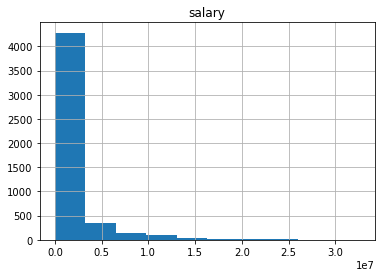

In [26]:
cleaned_data.hist("salary")

In [30]:
cleaned_data = cleaned_data[cleaned_data["salary"].notna()] # 排除salary这列nan的数值
cleaned_data

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,yearID,teamID,lgID,salary
6,aardsda01,"1,981.00",12.00,27.00,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,220.00,75.00,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,"2,012.00",NYA,AL,"500,000.00"
12,aasedo01,"1,954.00",9.00,8.00,USA,CA,Orange,NaN,NaN,NaN,NaN,NaN,NaN,Don,Aase,Donald William,190.00,75.00,R,R,1977-07-26,1990-10-03,aased001,aasedo01,"1,989.00",NYN,NL,"400,000.00"
13,abadan01,"1,972.00",8.00,25.00,USA,FL,Palm Beach,NaN,NaN,NaN,NaN,NaN,NaN,Andy,Abad,Fausto Andres,184.00,73.00,L,L,2001-09-10,2006-04-13,abada001,abadan01,"2,006.00",CIN,NL,"327,000.00"
17,abadfe01,"1,985.00",12.00,17.00,D.R.,La Romana,La Romana,NaN,NaN,NaN,NaN,NaN,NaN,Fernando,Abad,Fernando Antonio,220.00,73.00,L,L,2010-07-28,2015-10-03,abadf001,abadfe01,"2,015.00",OAK,AL,"1,087,500.00"
28,abbotje01,"1,972.00",8.00,17.00,USA,GA,Atlanta,NaN,NaN,NaN,NaN,NaN,NaN,Jeff,Abbott,Jeffrey William,190.00,74.00,R,L,1997-06-10,2001-09-29,abboj002,abbotje01,"2,001.00",FLO,NL,"300,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39438,zuletju01,"1,975.00",3.00,28.00,Panama,Panama,Panama,NaN,NaN,NaN,NaN,NaN,NaN,Julio,Zuleta,Julio Ernesto,230.00,78.00,R,R,2000-04-06,2001-06-25,zulej001,zuletju01,"2,001.00",CHN,NL,"200,000.00"
39444,zumayjo01,"1,984.00",11.00,9.00,USA,CA,Chula Vista,NaN,NaN,NaN,NaN,NaN,NaN,Joel,Zumaya,Joel Martin,215.00,75.00,R,R,2006-04-03,2010-06-28,zumaj001,zumayjo01,"2,011.00",DET,AL,"1,400,000.00"
39446,zuninmi01,"1,991.00",3.00,25.00,USA,FL,Cape Coral,NaN,NaN,NaN,NaN,NaN,NaN,Mike,Zunino,Michael Accorsi,220.00,74.00,R,R,2013-06-12,2015-08-27,zunim001,zuninmi01,"2,015.00",SEA,AL,"523,500.00"
39449,zupcibo01,"1,966.00",8.00,18.00,USA,PA,Pittsburgh,NaN,NaN,NaN,NaN,NaN,NaN,Bob,Zupcic,Robert,220.00,76.00,R,R,1991-09-07,1994-08-04,zupcb001,zupcibo01,"1,993.00",BOS,AL,"222,000.00"


In [37]:
cleaned_data.sort_values("salary", ascending = False)

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,yearID,teamID,lgID,salary
18735,kershcl01,"1,988.00",3.00,19.00,USA,TX,Dallas,NaN,NaN,NaN,NaN,NaN,NaN,Clayton,Kershaw,Clayton Edward,225.00,76.00,L,L,2008-05-25,2015-10-04,kersc001,kershcl01,"2,015.00",LAN,NL,"32,571,000.00"
36569,verlaju01,"1,983.00",2.00,20.00,USA,VA,Manakin Sabot,NaN,NaN,NaN,NaN,NaN,NaN,Justin,Verlander,Justin Brooks,225.00,77.00,R,R,2005-07-04,2015-10-03,verlj001,verlaju01,"2,015.00",DET,AL,"28,000,000.00"
16479,howarry01,"1,979.00",11.00,19.00,USA,MO,St. Louis,NaN,NaN,NaN,NaN,NaN,NaN,Ryan,Howard,Ryan James,250.00,76.00,L,L,2004-09-01,2015-09-14,howar001,howarry01,"2,015.00",PHI,NL,"25,000,000.00"
13538,greinza01,"1,983.00",10.00,21.00,USA,FL,Orlando,NaN,NaN,NaN,NaN,NaN,NaN,Zack,Greinke,Donald Zachary,195.00,72.00,R,R,2004-05-22,2015-10-03,greiz001,greinza01,"2,015.00",LAN,NL,"25,000,000.00"
20087,leecl02,"1,978.00",8.00,30.00,USA,AR,Benton,NaN,NaN,NaN,NaN,NaN,NaN,Cliff,Lee,Clifton Phifer,205.00,75.00,L,L,2002-09-15,2014-07-31,lee-c003,leecl02,"2,014.00",PHI,NL,"25,000,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17706,johnsjo04,"1,956.00",8.00,21.00,USA,TX,Houston,NaN,NaN,NaN,NaN,NaN,NaN,John Henry,Johnson,John Henry,190.00,74.00,L,L,1978-04-10,1987-06-29,johnj001,johnsjo04,"1,986.00",ML4,AL,"60,000.00"
30627,romanjo02,"1,963.00",5.00,21.00,D.R.,Puerto Plata,Puerto Plata,NaN,NaN,NaN,NaN,NaN,NaN,Jose,Roman,Jose Rafael,175.00,72.00,R,R,1984-09-05,1986-08-27,romaj001,romanjo02,"1,986.00",CLE,AL,"60,000.00"
5698,carych01,"1,960.00",3.00,3.00,USA,CA,Whittier,NaN,NaN,NaN,NaN,NaN,NaN,Chuck,Cary,Charles Douglas,210.00,76.00,L,L,1985-08-22,1993-10-02,caryc001,carych01,"1,994.00",CHA,AL,"50,000.00"
27401,penaal01,"1,959.00",6.00,25.00,D.R.,Puerto Plata,Cambiaso,NaN,NaN,NaN,NaN,NaN,NaN,Alejandro,Pena,Alejandro,200.00,73.00,R,R,1981-08-13,1996-04-13,penaa001,penaal01,"1,997.00",FLO,NL,"50,000.00"


(0.0, 50000000.0, 0.0, 5.0)

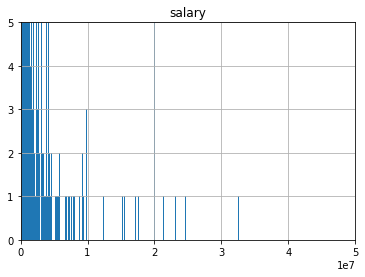

In [54]:
from matplotlib.pyplot import axis
cleaned_data.hist("salary" ,bins = 1000)
axis([0, 50000000, 0, 5])

> You can do the same with the column `yearID` to see how recent our data is.

> We have 30 years in our dataset, so we need to do some minor tweaking--namely, resetting the bins.

array([[<AxesSubplot:title={'center':'yearID'}>]], dtype=object)

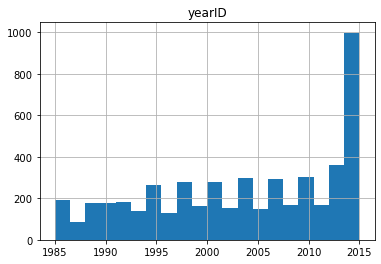

In [27]:
cleaned_data.hist("yearID", bins = 20)

## Who are the top 10% highest-paid players?

> Let's calculate the 90 percentile cutoff.

In [51]:
top_10_players_cutoff = cleaned_data["salary"].quantile(q = 0.90)
top_10_players_cutoff

4500000.0

> Let's filter out players that make more money than the cutoff.

In [56]:
players_with_top10_salaries = cleaned_data[cleaned_data["salary"] >= top_10_players_cutoff]
players_with_top10_salaries

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,yearID,teamID,lgID,salary
91,abreubo01,"1,974.00",3.00,11.00,Venezuela,Aragua,Maracay,NaN,NaN,NaN,NaN,NaN,NaN,Bobby,Abreu,Bob Kelly,220.00,72.00,L,R,1996-09-01,2014-09-28,abreb001,abreubo01,"2,012.00",LAA,AL,"9,000,000.00"
94,abreujo02,"1,987.00",1.00,29.00,Cuba,Cienfuegos,Cienfuegos,NaN,NaN,NaN,NaN,NaN,NaN,Jose,Abreu,Jose Dariel,255.00,75.00,R,R,2014-03-31,2015-10-03,abrej003,abreujo02,"2,015.00",CHA,AL,"8,666,000.00"
181,adamsmi03,"1,978.00",7.00,29.00,USA,TX,Corpus Christi,NaN,NaN,NaN,NaN,NaN,NaN,Mike,Adams,Jon Michael,210.00,77.00,R,R,2004-05-18,2014-09-18,adamm001,adamsmi03,"2,014.00",PHI,NL,"7,000,000.00"
237,affelje01,"1,979.00",6.00,6.00,USA,AZ,Phoenix,NaN,NaN,NaN,NaN,NaN,NaN,Jeremy,Affeldt,Jeremy David,225.00,76.00,L,L,2002-04-06,2015-10-04,affej001,affelje01,"2,015.00",SFN,NL,"6,000,000.00"
395,alfoned01,"1,973.00",11.00,8.00,Venezuela,Miranda,Santa Teresa del Tuy,NaN,NaN,NaN,NaN,NaN,NaN,Edgardo,Alfonzo,Edgardo Antonio,210.00,71.00,R,R,1995-04-26,2006-06-11,alfoe001,alfoned01,"2,006.00",LAA,AL,"8,000,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39364,zieglbr01,"1,979.00",10.00,10.00,USA,KS,Pratt,NaN,NaN,NaN,NaN,NaN,NaN,Brad,Ziegler,Brad Gregory,220.00,76.00,R,R,2008-05-31,2015-10-04,ziegb001,zieglbr01,"2,015.00",ARI,NL,"5,000,000.00"
39387,zimmejo02,"1,986.00",5.00,23.00,USA,WI,Auburndale,NaN,NaN,NaN,NaN,NaN,NaN,Jordan,Zimmermann,Jordan M.,225.00,74.00,R,R,2009-04-20,2015-09-30,zimmj003,zimmejo02,"2,015.00",WAS,NL,"16,500,000.00"
39397,zimmery01,"1,984.00",9.00,28.00,USA,NC,Washington,NaN,NaN,NaN,NaN,NaN,NaN,Ryan,Zimmerman,Ryan Wallace,220.00,75.00,R,R,2005-09-01,2015-09-07,zimmr001,zimmery01,"2,015.00",WAS,NL,"14,000,000.00"
39421,zitoba01,"1,978.00",5.00,13.00,USA,NV,Las Vegas,NaN,NaN,NaN,NaN,NaN,NaN,Barry,Zito,Barry William,205.00,74.00,L,L,2000-07-22,2015-09-30,zitob001,zitoba01,"2,013.00",SFN,NL,"20,000,000.00"


> Let's use the `nlargest` to see the top 10 best paid players.

In [59]:
top10 = players_with_top10_salaries.nlargest(10, "salary")
top10

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,yearID,teamID,lgID,salary
18735,kershcl01,"1,988.00",3.00,19.00,USA,TX,Dallas,NaN,NaN,NaN,NaN,NaN,NaN,Clayton,Kershaw,Clayton Edward,225.00,76.00,L,L,2008-05-25,2015-10-04,kersc001,kershcl01,"2,015.00",LAN,NL,"32,571,000.00"
36569,verlaju01,"1,983.00",2.00,20.00,USA,VA,Manakin Sabot,NaN,NaN,NaN,NaN,NaN,NaN,Justin,Verlander,Justin Brooks,225.00,77.00,R,R,2005-07-04,2015-10-03,verlj001,verlaju01,"2,015.00",DET,AL,"28,000,000.00"
13538,greinza01,"1,983.00",10.00,21.00,USA,FL,Orlando,NaN,NaN,NaN,NaN,NaN,NaN,Zack,Greinke,Donald Zachary,195.00,72.00,R,R,2004-05-22,2015-10-03,greiz001,greinza01,"2,015.00",LAN,NL,"25,000,000.00"
16479,howarry01,"1,979.00",11.00,19.00,USA,MO,St. Louis,NaN,NaN,NaN,NaN,NaN,NaN,Ryan,Howard,Ryan James,250.00,76.00,L,L,2004-09-01,2015-09-14,howar001,howarry01,"2,015.00",PHI,NL,"25,000,000.00"
20087,leecl02,"1,978.00",8.00,30.00,USA,AR,Benton,NaN,NaN,NaN,NaN,NaN,NaN,Cliff,Lee,Clifton Phifer,205.00,75.00,L,L,2002-09-15,2014-07-31,lee-c003,leecl02,"2,014.00",PHI,NL,"25,000,000.00"
15555,hernafe02,"1,986.00",4.00,8.00,Venezuela,Carabobo,Valencia,NaN,NaN,NaN,NaN,NaN,NaN,Felix,Hernandez,Felix Abraham,225.00,75.00,R,R,2005-08-04,2015-09-26,hernf002,hernafe02,"2,015.00",SEA,AL,"24,857,000.00"
37613,wellsve01,"1,978.00",12.00,8.00,USA,LA,Shreveport,NaN,NaN,NaN,NaN,NaN,NaN,Vernon,Wells,Vernon M.,230.00,73.00,R,R,1999-08-30,2013-09-29,wellv001,wellsve01,"2,013.00",NYA,AL,"24,642,857.00"
5384,canoro01,"1,982.00",10.00,22.00,D.R.,San Pedro de Macoris,San Pedro de Macoris,NaN,NaN,NaN,NaN,NaN,NaN,Robinson,Cano,Robinson Jose,210.00,72.00,L,R,2005-05-03,2015-10-04,canor001,canoro01,"2,015.00",SEA,AL,"24,000,000.00"
10823,fieldpr01,"1,984.00",5.00,9.00,USA,CA,Ontario,NaN,NaN,NaN,NaN,NaN,NaN,Prince,Fielder,Prince Semien,275.00,71.00,L,R,2005-06-13,2015-10-04,fielp001,fieldpr01,"2,015.00",TEX,AL,"24,000,000.00"
28702,pujolal01,"1,980.00",1.00,16.00,D.R.,Distrito Nacional,Santo Domingo,NaN,NaN,NaN,NaN,NaN,NaN,Albert,Pujols,Jose Alberto,230.00,75.00,R,R,2001-04-02,2015-10-04,pujoa001,pujolal01,"2,015.00",LAA,AL,"24,000,000.00"


In [60]:
players_with_top10_salaries.nsmallest(10, "salary")

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,yearID,teamID,lgID,salary
2134,beckro01,"1,968.00",8.00,3.00,USA,CA,Burbank,"2,007.00",6.00,23.00,USA,AZ,Phoenix,Rod,Beck,Rodney Roy,215.00,73.00,R,R,1991-05-06,2004-08-14,beckr001,beckro01,"2,001.00",BOS,AL,"4,500,000.00"
2147,bedarer01,"1,979.00",3.00,5.00,CAN,ON,Navan,NaN,NaN,NaN,NaN,NaN,NaN,Erik,Bedard,Erik Joseph,195.00,73.00,L,L,2002-04-17,2014-07-12,bedae001,bedarer01,"2,012.00",PIT,NL,"4,500,000.00"
3011,blairwi01,"1,965.00",12.00,18.00,USA,KY,Paintsville,NaN,NaN,NaN,NaN,NaN,NaN,Willie,Blair,William Allen,185.00,73.00,R,R,1990-04-11,2001-07-26,blaiw001,blairwi01,"2,000.00",DET,AL,"4,500,000.00"
5425,cappsma01,"1,983.00",9.00,3.00,USA,GA,Douglasville,NaN,NaN,NaN,NaN,NaN,NaN,Matt,Capps,Matthew Dicus,250.00,74.00,R,R,2005-09-16,2012-09-24,cappm001,cappsma01,"2,012.00",MIN,AL,"4,500,000.00"
6199,chenbr01,"1,977.00",6.00,19.00,Panama,Panama,Panama,NaN,NaN,NaN,NaN,NaN,NaN,Bruce,Chen,Bruce Kastulo,215.00,74.00,L,L,1998-09-07,2015-05-15,chenb001,chenbr01,"2,013.00",KCA,AL,"4,500,000.00"
7226,cordefr01,"1,975.00",5.00,11.00,D.R.,Distrito Nacional,Santo Domingo,NaN,NaN,NaN,NaN,NaN,NaN,Francisco,Cordero,Francisco Javier,245.00,75.00,R,R,1999-08-02,2012-08-01,cordf002,cordefr01,"2,012.00",TOR,AL,"4,500,000.00"
7502,crainje01,"1,981.00",7.00,5.00,CAN,ON,Toronto,NaN,NaN,NaN,NaN,NaN,NaN,Jesse,Crain,Jesse Alan,215.00,73.00,R,R,2004-08-05,2013-06-29,craij001,crainje01,"2,013.00",CHA,AL,"4,500,000.00"
7933,daalom01,"1,972.00",3.00,1.00,Venezuela,Zulia,Maracaibo,NaN,NaN,NaN,NaN,NaN,NaN,Omar,Daal,Omar Jesus,160.00,75.00,L,L,1993-04-23,2003-09-25,daalo001,daalom01,"2,004.00",BAL,AL,"4,500,000.00"
9503,dukeza01,"1,983.00",4.00,19.00,USA,TX,Clifton,NaN,NaN,NaN,NaN,NaN,NaN,Zach,Duke,Zachary Thomas,210.00,74.00,L,L,2005-07-02,2015-10-03,dukez001,dukeza01,"2,015.00",CHA,AL,"4,500,000.00"
10660,felizpe01,"1,975.00",4.00,27.00,D.R.,Azua,Azua,NaN,NaN,NaN,NaN,NaN,NaN,Pedro,Feliz,Pedro Julio,210.00,73.00,R,R,2000-09-05,2010-10-03,felip001,felizpe01,"2,010.00",HOU,NL,"4,500,000.00"


> Now let's visualize the results.

<AxesSubplot:xlabel='nameGiven'>

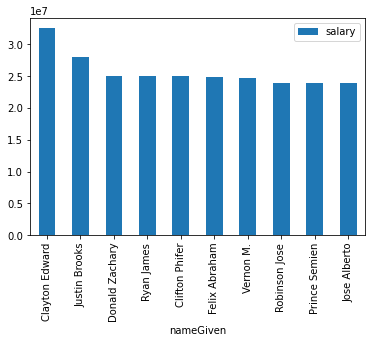

In [65]:
# top10.plot(kind = "bar", x = "nameGiven", y = "salary")
top10.plot.bar(x = "nameGiven", y = "salary")

> Let's save the data.

In [66]:
# How to export your data

top10.to_csv("top10_wage_earners_in_MLB.csv", index = False)

In [68]:
import numpy as np
import matplotlib.pyplot as plt

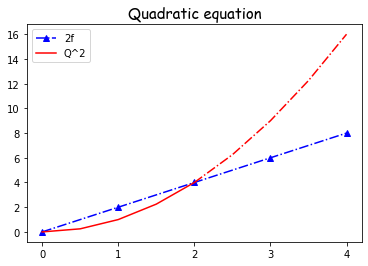

In [78]:
q = [0, 1, 2, 3, 4]
f = [0, 2, 4, 6, 8]

plt.plot(q, f, "b^-.", label = "2f")

q2 = np.arange(0, 4.5, 0.5)

plt.plot(q2[ :5], q2[ :5]**2, "r", label = "Q^2")
plt.plot(q2[4: ], q2[4: ]**2, "r-.")

plt.xticks([0, 1, 2, 3, 4])

plt.title("Quadratic equation", fontdict = {"fontname": "Comic Sans MS", "fontsize": 15})

plt.legend()
plt.show()

In [75]:
q2

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. ])

`Thank you for working with the script.`

In [ ]:
exit()